# Mapping Weather Warning Areas

Weather warnings often cover specific geographical regions. The MeteoAlarms API provides these areas as GeoJSON geometries. Let's see how we can visualize these warning areas with appropriate styling based on severity levels.

First, let's import the necessary libraries:

In [15]:
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import json

## Request the desired warnings

For this example, we request the warnings for Italy and select the first one for our plot.

In [16]:
warnings = MeteoAlarm(['italy'])
warning = warnings[0]

## Selecting and Styling a Warning
We'll select a specific warning from our dataset and apply styling based on its severity level. The MeteoAlarms system typically uses color coding to indicate severity:

In [17]:
if warning.severity == 'Moderate': # Yellow
    facecolor = "#FFB200"
    edgecolor = "#EB5B00"
elif warning.severity == 'Severe': # Orange
    facecolor = "#FF204E"
    edgecolor = "#A0153E"
elif warning.severity == 'Extreme': # Red
    facecolor = "#FF204E"
    edgecolor = "#A0153E"

## Creating a Properly Framed Map
To create a visually appealing map, we need to calculate appropriate bounds. This helper function ensures our warning area is properly centered and framed:

In [18]:
def calculate_zoomed_squared_extent(gdf, zoom_out_factor=1.5):
    bounds = gdf.total_bounds
    x_min, y_min, x_max, y_max = bounds
    x_range = x_max - x_min
    y_range = y_max - y_min
    max_range = max(x_range, y_range) * zoom_out_factor

    x_center = (x_max + x_min) / 2
    y_center = (y_max + y_min) / 2

    x_min_new = x_center - max_range / 2
    x_max_new = x_center + max_range / 2
    y_min_new = y_center - max_range / 2
    y_max_new = y_center + max_range / 2

    return x_min_new, x_max_new, y_min_new, y_max_new

## Converting Warning Geometry to GeoDataFrame
Now, let's convert the warning's GeoJSON geometry to a GeoDataFrame for plotting:

In [19]:
# Parse the GeoJSON string
geojson_dict = json.loads(warning.geometry)

# Create geometry object
geometry = shape(geojson_dict)

# Create GeoDataFrame directly
gdf = gpd.GeoDataFrame(geometry=[geometry], crs="EPSG:4326")

# Convert to Web Mercator projection for contextily
gdf_web = gdf.to_crs(epsg=3857)

## Creating the Map Visualization
Finally, let's create a visually informative map that highlights the warning area:

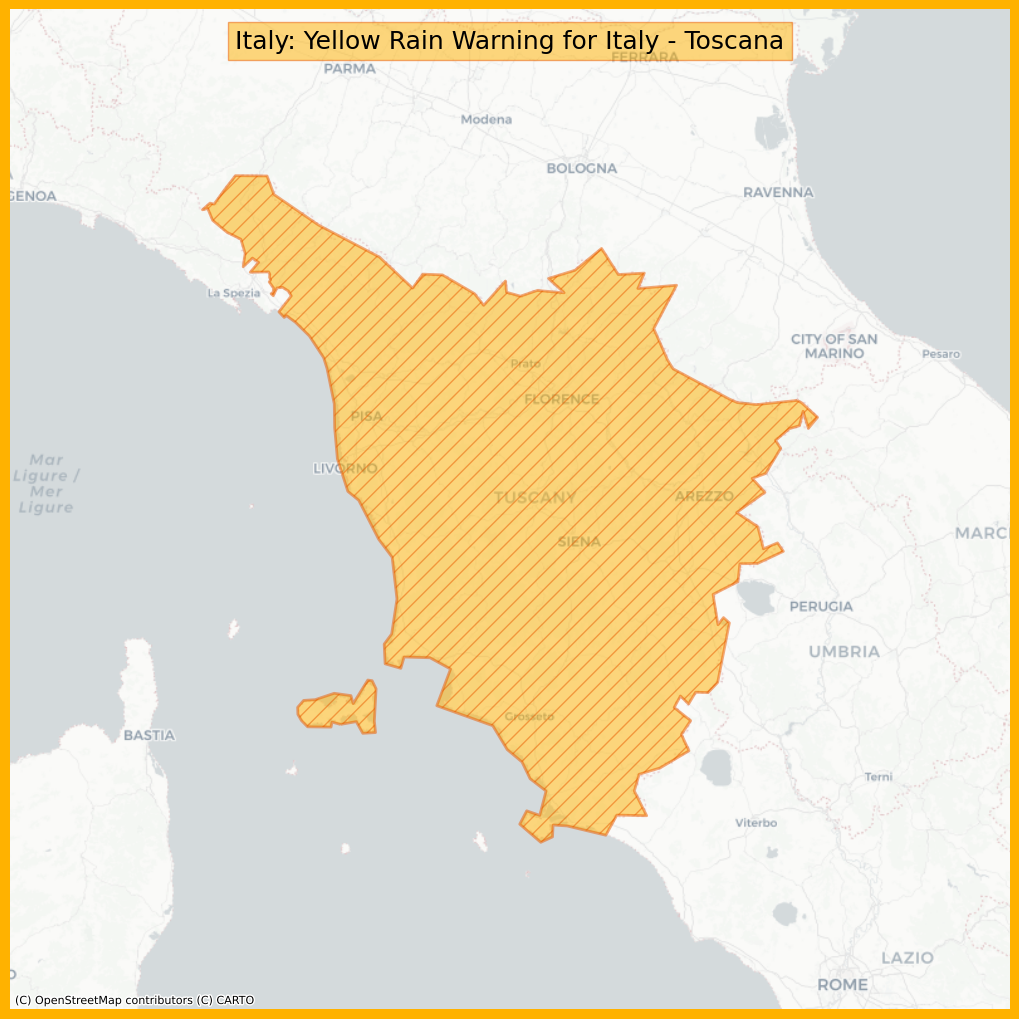

In [20]:
# Calculate squared extent
x_min_new, x_max_new, y_min_new, y_max_new = calculate_zoomed_squared_extent(gdf_web)

# Create plot with custom background color
fig, ax = plt.subplots(figsize=(10, 10), facecolor=facecolor)
gdf_web.plot(ax=ax, alpha=0.5, edgecolor=edgecolor, facecolor=facecolor, hatch='//', linewidth=2)

# Set new squared extent
ax.set_xlim([x_min_new, x_max_new])
ax.set_ylim([y_min_new, y_max_new])

# Add background map with a different basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Add title above the map
plt.suptitle(warning.country.title() + ": " + warning.get_headline(), 
             bbox=dict(facecolor=facecolor, edgecolor=edgecolor, alpha=0.5, pad=5), 
             fontsize=18)

plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)
ax.set_position([0, 0, 1, 1])

plt.show()

The resulting map shows the warning area with:

- Color-coded regions based on severity (red for severe, orange for moderate)
- Hatched pattern to enhance visibility
- A clean basemap from CartoDB for geographical context
- A title showing the country and warning headline

This visualization approach makes it easy to quickly assess the geographical extent of weather warnings and their severity, which is crucial for emergency management and public awareness.